In [1]:
import numpy as np 
import pandas as pd 
import sys, os

In [2]:
sys.path.append('../src')
from interaction import Interaction

In [3]:
slide_outs = '/ix/djishnu/Jane/SLIDESWING/jing_data/KIR+CD8/KIR+CD8_filtered85/KIR+CD8_filtered85_noint_output/0.1_1_out'
machop = Interaction(slide_outs)

In [4]:
beta_interaction = machop.compute()
beta_interaction 

/ix/djishnu/alw399/envs/otter/lib/python3.10/site-packages/knockpy/mrc.py:276: UserWarning: 
	---------------------------------------------------------
	---------------------------------------------------------
	The choldate package is not installed:
	solving for MVR or maxent knockoffs without it will be 
	~5x slower. For instructions on how to install choldate,
	see https://amspector100.github.io/knockpy/installation.html.
	To disable this warning, set choldate_warning=False as an 
	argument or a knockoff_kwarg.
	----------------------------------------------------------
	----------------------------------------------------------

  warnings.warn(constants.CHOLDATE_WARNING)


array([[ 1.19569157e+00, -8.17082763e-02, -5.81245104e-01,
        -1.62518955e+00],
       [-2.14360723e-01, -1.97111116e-02, -5.36856029e-01,
         4.74744080e-02],
       [ 1.43337773e+00,  2.00181782e-01,  2.29930476e+00,
        -1.73139111e+00],
       [ 8.38468078e-01, -3.38029364e-01, -2.91554210e+01,
        -1.75960957e+00]])

In [5]:
# machop.rejections

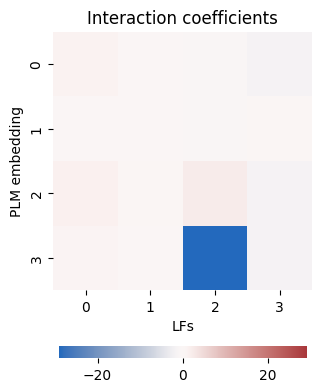

In [8]:
import seaborn as sns 
import matplotlib.pyplot as plt

max = np.max(np.abs(beta_interaction))

fig, ax = plt.subplots()
sns.heatmap(beta_interaction, square=True, ax=ax, vmin=-max, vmax=max, 
            cmap='vlag', cbar_kws={'orientation': 'horizontal', 'shrink': 0.5})
_ = ax.set(xlabel='LFs', ylabel='PLM embedding', title='Interaction coefficients')

<Axes: >

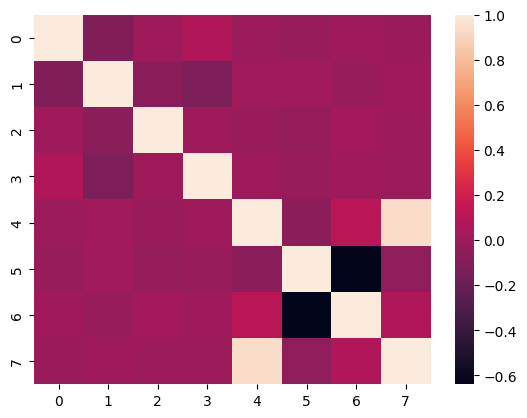

In [7]:
correlation_matrix = np.corrcoef(machop.z_matrix.T, machop.plm_embedding.T)
sns.heatmap(correlation_matrix)